In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

In [5]:
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n, k]*d(M[k], X[n])
    return cost

In [6]:
def plot_k_means(X, K, max_iter=20, beta=1):
    # Get X shape
    N, D = X.shape
    
    # Means initialize to zero KxD dimensionallity
    M = np.zeros((K, D))
    
    # Responsability matrix
    R = np.zeros((N, K))
    
    # Initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        
    random_colors = np.random.random((K, 3))
        
    # Know the progress in each iteration
    costs = np.zeros(max_iter)
    
    for i in range(max_iter):
        # Moved the plot inside the for loop
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.title('Iteration: ' + str(i))
        plt.show()
        
        # Step 1: determine resposibilities
        for k in range(K):
            for n in range(N):
                R[n, k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
                
        # Step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
            
        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                #Plot costs
                plt.plot(costs)
                plt.title('costs')
                plt.show()
                break

In [7]:
def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X

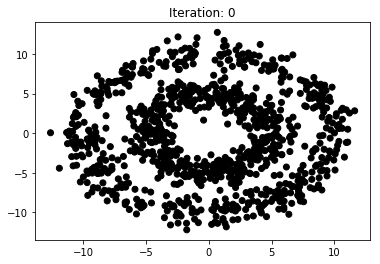

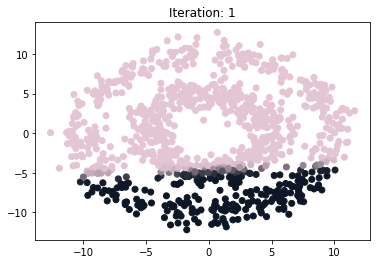

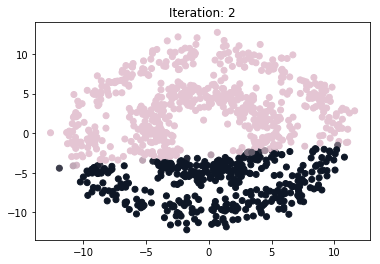

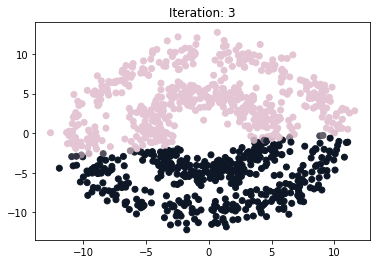

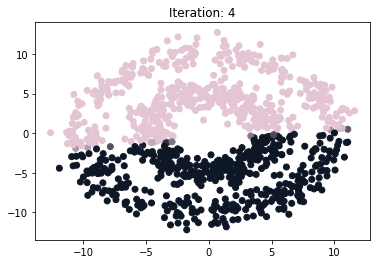

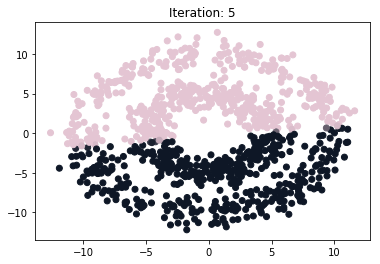

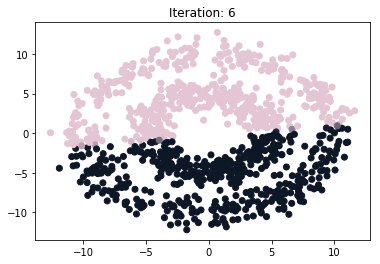

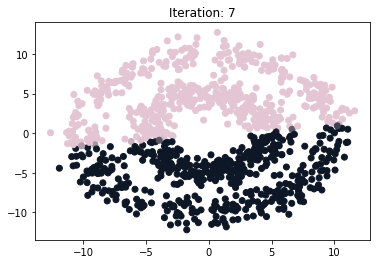

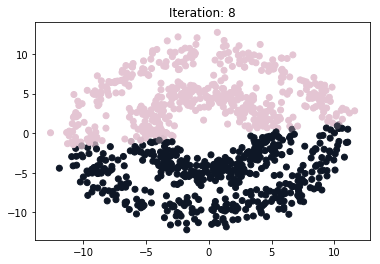

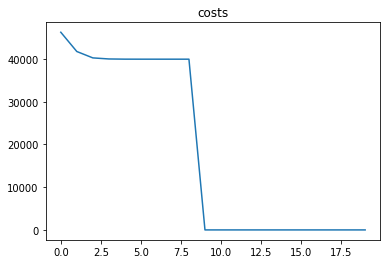

In [8]:
# donut
X = donut()
plot_k_means(X, 2)

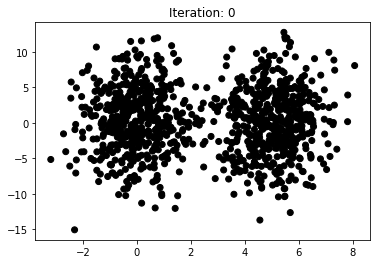

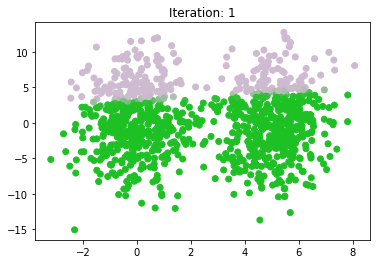

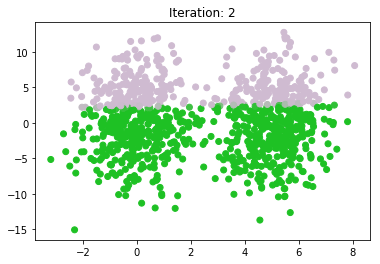

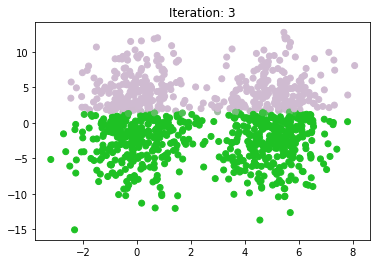

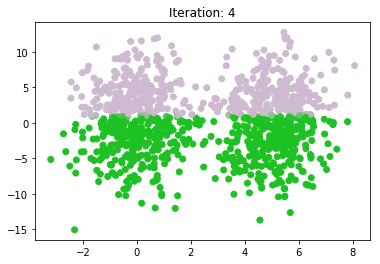

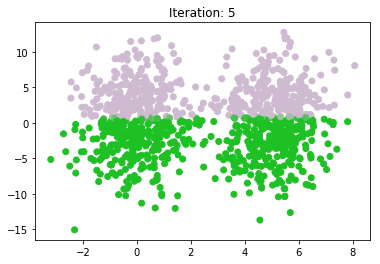

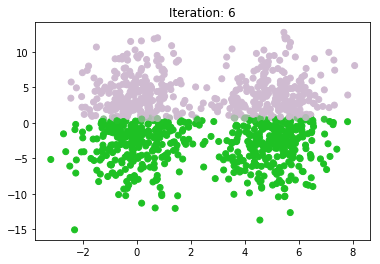

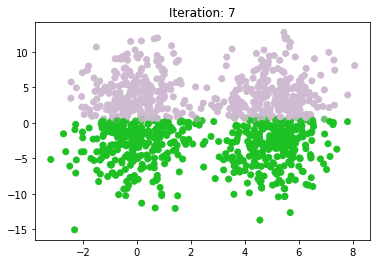

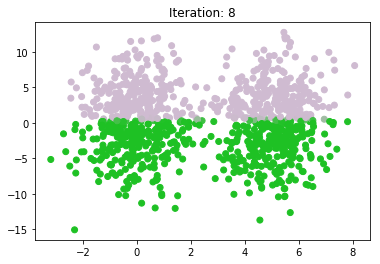

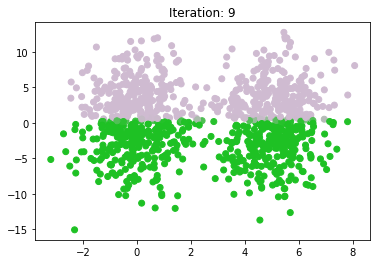

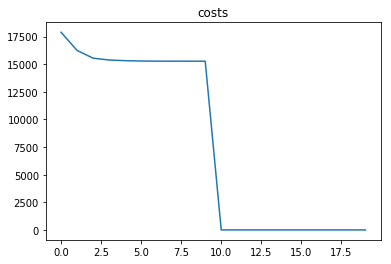

In [9]:
# elongated clusters
X = np.zeros((1000, 2))
X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
plot_k_means(X, 2)

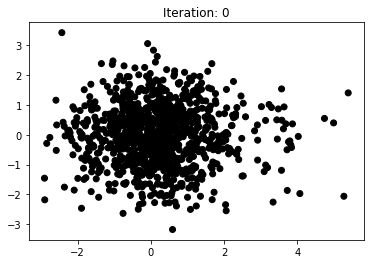

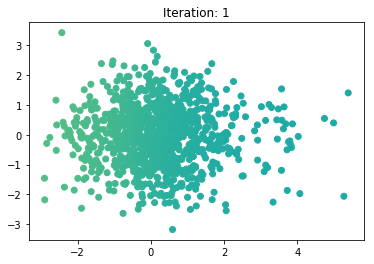

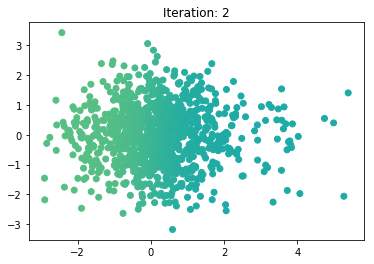

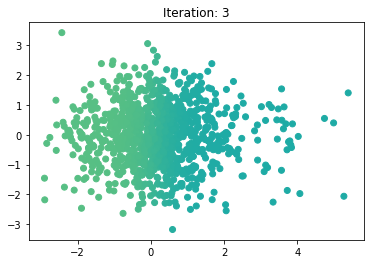

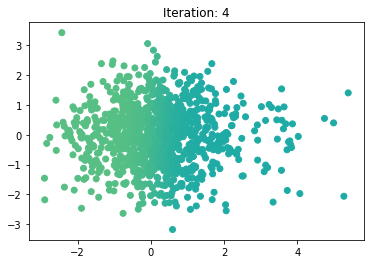

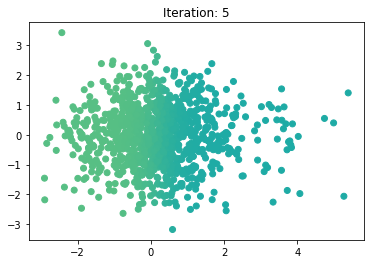

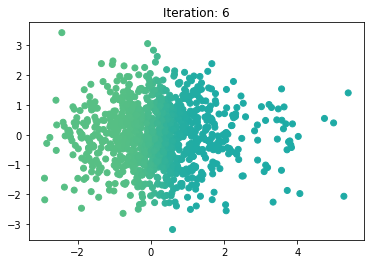

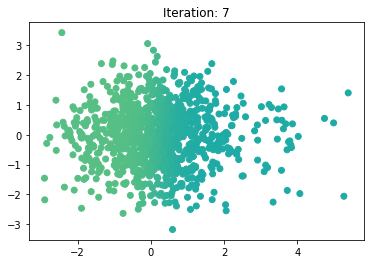

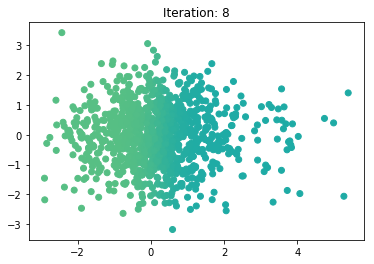

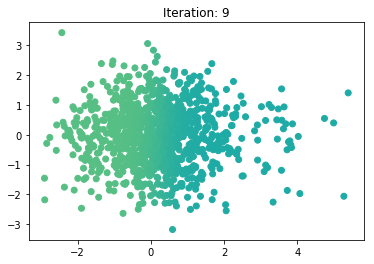

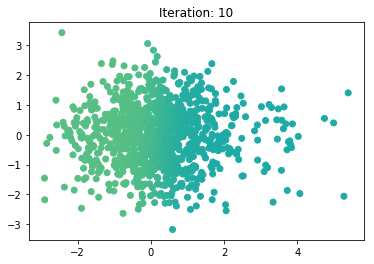

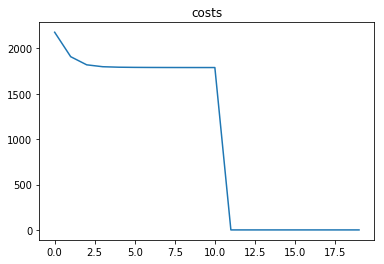

In [10]:
# different density
X = np.zeros((1000, 2))
X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
plot_k_means(X, 2)